### Investigation on capital consumption

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("Dataset.csv")

In [3]:
df

,PERIOD,CUSTOMER_ID,BRANCH,APPROACH,RATING,PD,LGD,ORIGINAL_EXPOSURE,EAD_AMOUNT,RWA,EXPECTED_LOSS
0,Period1,H136768,Sydney,AIRB,PC2,0.07060,0.316,50000.0,4250.0,4832.7,94.8
1,Period2,H136768,Sydney,AIRB,PC2,0.07060,0.316,50000.0,25000.0,28235.2,557.7
2,Period1,G136767,Sydney,AIRB,PC0+,1.00000,0.316,1000.0,0.0,0.0,0.0
3,Period2,G136767,Sydney,AIRB,PC0+,1.00000,0.316,900.0,0.0,0.0,0.0
4,Period2,C136711,Sydney,AIRB,PC0+,1.00000,0.316,241.4,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1604416,Period2,V341740,Kuala Lumpur,FIRB,PC4,0.00353,0.450,783.8,783.8,490.3,1.2
1604417,Period2,C341721,Kuala Lumpur,FIRB,PC4,0.00353,0.450,921.6,921.6,493.4,1.5
1604418,Period2,C341721,Kuala Lumpur,FIRB,PC4,0.00353,0.400,1400.7,1400.7,666.6,2.0
1604419,Period2,W341741,Kuala Lumpur,FIRB,PC3,0.01247,0.450,334.6,334.6,284.5,1.9


In [4]:
df["CAPITAL"]=df["RWA"]* 8/100

In [5]:
df["Risk_Weight"]= df["RWA"]/df["EAD_AMOUNT"]

In [6]:
result=df.pivot_table(index=['CUSTOMER_ID'], columns='PERIOD', values='CAPITAL',aggfunc="mean")

In [7]:
### The total amount of Capital Consumption in period 1

In [8]:
c=result["Period1"]
a=c.mean()
a

184.35452291921393

In [9]:
### The total amount of Capital Consumption in period 1

In [10]:
c1=result["Period2"]
a2=c1.mean()
a2

190.71535861510452

In [11]:
### The total amount of Capital Consumption for exist customers

In [12]:
Exist_customer=result[(result['Period1'].notna()) & (result['Period2'].notna())]                                                                                                

In [13]:
c3=Exist_customer["Period2"]
a3=c3.mean()
a3

129.38688528902676

In [14]:
### The total amount of Capital Consumption for New customers

In [15]:
New_customer=result[(result['Period1'].isna()) & (result['Period2'].notna())]                                                                                                

In [16]:
c4=New_customer["Period2"]
a4=c4.mean()
a4

462.19837856752736

In [17]:
### Capital_Unrated (RATING=pcu)

In [18]:
df1=df[df["RATING"]=="PCU"]

In [19]:
df1["Risk_Weight"]= df1["RWA"]/df1["EAD_AMOUNT"]

In [20]:
result=df1.pivot_table(index=['CUSTOMER_ID'], columns='PERIOD', values='CAPITAL',aggfunc="mean")

In [21]:
### The total amount of Capital Consumption in period 1

In [22]:
c=result["Period1"]
a=c.mean()
a

39.452072732100525

In [23]:
### The total amount of Capital Consumption in period 2

In [24]:
c1=result["Period2"]
a2=c1.mean()
a2

61.82077516609583

In [25]:
### The total amount of Capital Consumption for exist customers

In [26]:
Exist_customer=result[(result['Period1'].notna()) & (result['Period2'].notna())]                                                                                                

In [27]:
c3=Exist_customer["Period2"]
a3=c3.mean()
a3

22.587871841946207

In [28]:
### The total amount of Capital Consumption for new customers

In [29]:
New_customer=result[(result['Period1'].isna()) & (result['Period2'].notna())]                                                                                                

In [30]:
c4=New_customer["Period2"]
a4=c4.mean()
a4

166.96614765882055

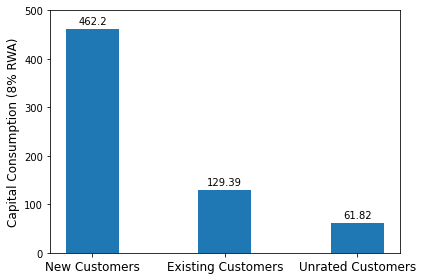

In [31]:
labels = ['New Customers', 'Existing Customers', "Unrated Customers"]
Risk_Normal = [462.20, 129.39, 61.82]


x = np.arange(len(labels))  # the label locations
width = 0.4  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x, Risk_Normal, width, label='Normal')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Capital Consumption (8% RWA)', fontsize=12)
ax.set_xticks(x, labels, fontsize=12)
ax.bar_label(rects1, padding=3)

plt.ylim([0,500])
fig.tight_layout()

plt.show()